<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Nov_3_4/Binary_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

Cargamos los datos que vamos a trabajar.

In [2]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/Machine_Learning/CATS_DOGS/*')

In [3]:
len(files)

1817

In [4]:
#numero de pixeles para nuestras imágenes.
num_px=64

Preparamos el dataset de entrenamiento.

In [5]:
train_x=[]
train_y=[]
for file in files[:100]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

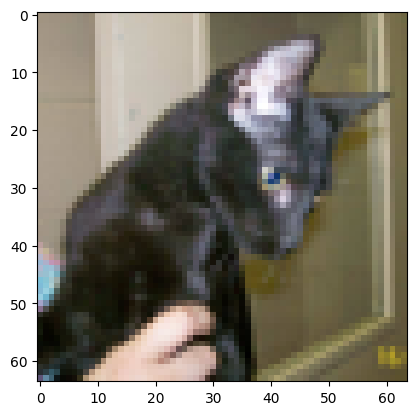

In [6]:
plt.imshow(train_x[0])

Preparamos el dataset de prueba

In [7]:
test_x=[]
test_y=[]
for file in files[1700:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

In [8]:
test_x.shape

(117, 64, 64, 3)

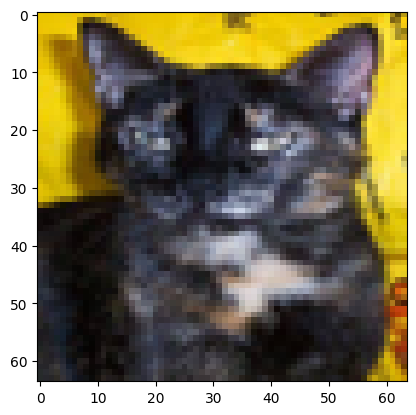

In [9]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión

In [10]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes

In [11]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

In [12]:
train_set_x.shape[1]

100

Ya esta listo nuestro set de datos para poder trabajar con el.

$a = \sigma(z)=\frac{1}{1+e^{-z}}$ ; Función de activación

In [13]:
#Función de activación
def sigmoide(z): #Defino la función de activación (sigmoide)
  a = 1/(1+np.exp(-z))
  return a

In [14]:
def ceros(dim): #inicializo los pesos en cero, defino la función para que la dimensión
  w = np.zeros((dim,1)) #de los pesos iniciales sea la misma que la del conjunto x y poder realizar los cálculos
  b = 0
  return w,b

$z = w^{T}x+b$ ; Modelo para la función de activación

In [15]:
w,b = ceros(train_set_x.shape[0]) #Prueba de la función de activación para el conjunto de entrenamiento
l = sigmoide(np.matmul(w.T,train_set_x)+b)
l.shape

(1, 100)

Función costo

$J(w,b,)= -\frac{1}{m}\sum{[y^{(i)}\log{\hat{y}^{(i)}}+(1-y^{(i)})\log{(1-\hat{y}^{(i)}})]}$

In [16]:
#PRUEBA
#de la función costo para el conjunto de entrenamiento
J = 0
w, b = ceros(train_set_x.shape[0])
for j in range(10):
  suma = 0
  a = sigmoide(np.matmul(w.T,train_set_x)+b) #Calcula la función de activación con w,b iguales a cero en principio
  w = w-0.01*(1/100)*np.matmul(train_set_x,(l-train_set_y).T) #Actualizamos w usando dw
  b = b-0.01*(1/100)*(a-train_set_y) #Actualizamos b usando db
  for i in range(l.shape[1]): #Calculamos el costo de nuevo
    suma += train_set_y[:1,i]*np.log(a[:1,i])+(1-train_set_y[:1,i])*np.log(1-(a[:1,i]))
  J = -(1/100)*sum(suma)
  print(j,'-ésima it.:', J) #Imprimimos el costo por iteración

0 -ésima it.: 0.693147180559946
1 -ésima it.: 1.5278326358347254
2 -ésima it.: 3.04874303048681
3 -ésima it.: 4.572995065893189
4 -ésima it.: 6.097317210250419
5 -ésima it.: 7.62164335771208
6 -ésima it.: 9.14596979228577
7 -ésima it.: 10.670296248345819
8 -ésima it.: 12.194622706029042
9 -ésima it.: 13.718949163835187


In [28]:
def prop(x,y,w,b, iteraciones, alpha):
  m = x.shape[1]
  w , b = ceros(x.shape[0]) #Inicializamos los pesos en cero
  for i in range(iteraciones):
    suma = 0 #Defino la variable donde guardaré el valor de la sumatoria para el cálculo del costo
    a = sigmoide(np.matmul(w.T,x)+b) #Calcula la función de activación con w,b iguales a cero en principio
    w = w-alpha*(1/m)*np.matmul(x,(a-y).T) #Actualizamos w usando dw
    b = b-alpha*(1/m)*(a-y) #Actualizamos b usando db
    for j in range(a.shape[1]): #Hacemos el cálculo del costo con el w,b iniciales
      suma += y[:1,j]*np.log(a[:1,j])+(1-y[:1,j])*np.log(1-(a[:1,j]))
    J = -(1/m)*sum(suma) #Calculamos el costo
    f = i%100
    if f == 0:
      print('J en la ',i,'-ésima iteracion:', J) #Imprimimos el costo en cada iteración
  return w, b, J

In [29]:
r = prop(train_set_x, train_set_y, w,b, 1000, 0.01) #Realizo el grad. desc. con el conjunto de entrenamiento

J en la  0 -ésima iteracion: 0.693147180559946
J en la  100 -ésima iteracion: 0.32504515396916966
J en la  200 -ésima iteracion: 0.26356635635148723
J en la  300 -ésima iteracion: 0.13138235230335016
J en la  400 -ésima iteracion: 0.08519469041983874
J en la  500 -ésima iteracion: 0.07134206029557405
J en la  600 -ésima iteracion: 0.061292075189087795
J en la  700 -ésima iteracion: 0.05364944130488129
J en la  800 -ésima iteracion: 0.04764796443498916
J en la  900 -ésima iteracion: 0.042817249222884025


In [30]:
r = prop(test_set_x, test_set_y, w,b, 1000, 0.001) #Realizo el grad. desc. con el conjunto de prueba

J en la  0 -ésima iteracion: 0.6931471805599462
J en la  100 -ésima iteracion: 0.0074775463737977955
J en la  200 -ésima iteracion: 0.004103544528232179
J en la  300 -ésima iteracion: 0.002883961547454439
J en la  400 -ésima iteracion: 0.002243222671276595
J en la  500 -ésima iteracion: 0.0018447019302501196
J en la  600 -ésima iteracion: 0.0015714156234837389
J en la  700 -ésima iteracion: 0.0013716344251698005
J en la  800 -ésima iteracion: 0.0012188316635405613
J en la  900 -ésima iteracion: 0.0010979534588210782


In [40]:
r = prop(test_set_x, test_set_y, w,b, 1000, 0.001) #Realizo el grad. desc. con el conjunto de prueba

J en la  0 -ésima iteracion: 0.6931471805599462
J en la  100 -ésima iteracion: 0.0074775463737977955
J en la  200 -ésima iteracion: 0.004103544528232179
J en la  300 -ésima iteracion: 0.002883961547454439
J en la  400 -ésima iteracion: 0.002243222671276595
J en la  500 -ésima iteracion: 0.0018447019302501196
J en la  600 -ésima iteracion: 0.0015714156234837389
J en la  700 -ésima iteracion: 0.0013716344251698005
J en la  800 -ésima iteracion: 0.0012188316635405613
J en la  900 -ésima iteracion: 0.0010979534588210782


Vemos que finalmente minimiza la función costo!!! :D

Aplicamos el método a una imagen espécifica

In [143]:
def binary(x, y, w, b ,imagen):
  p = sigmoide(np.matmul(w.T, x)+b)
  ytst = np.matmul(w.T, x)+b
  ytst = -(ytst/100) #Usamos la función de activación con los pesos finales
  if ytst[:1,imagen]< 0.5:
    ytst[:1,imagen]=0 #Evaluamos en la imagen específica
    print('La imagen ',imagen,' es un perro')
  if ytst[:1,imagen] > 0.5:
    ytst[:1,imagen]=1
    print('La imagen ',imagen,' es un gato')
  return ytst

In [144]:
twst2 = binary(train_set_x, train_set_y, w, b, 75)

La imagen  75  es un gato


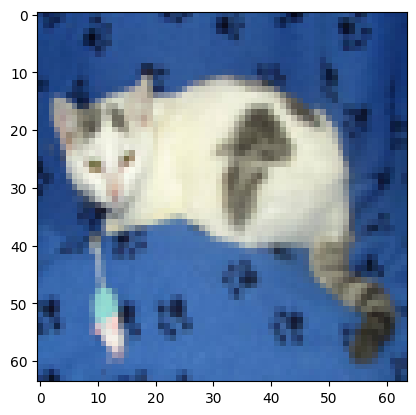

In [23]:
plt.imshow(train_x[75])

In [145]:
twst2 = binary(train_set_x, train_set_y, w, b, 9)

La imagen  9  es un gato


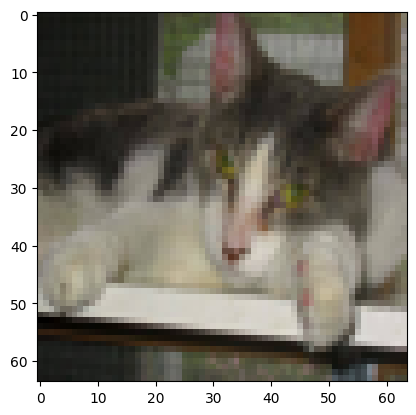

In [33]:
plt.imshow(train_x[9])

In [146]:
twst2 = binary(train_set_x, train_set_y, w, b, 24)

La imagen  24  es un perro


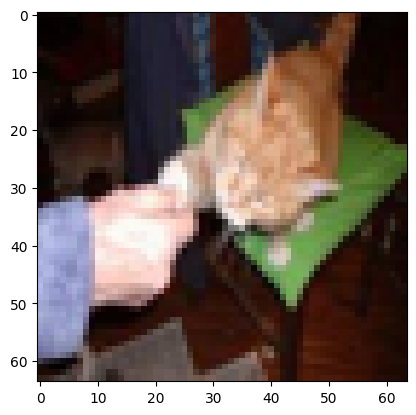

In [149]:
plt.imshow(train_x[24])

In [159]:
def porcentaje(x,y, ytst):
  suma = 0
  porcentaje = 0
  for i in range(len(x[1])):
    p = binary(x,y,w,b,i)
    if y[:1,i] == ytst[i]:
      suma += 1
  porcentaje = (suma/i)*100
  print(porcentaje, '%')
  return porcentaje

In [160]:
tstttt = porcentaje(train_set_x, train_set_y, test_y)

La imagen  0  es un gato
La imagen  1  es un gato
La imagen  2  es un gato
La imagen  3  es un gato
La imagen  4  es un gato
La imagen  5  es un gato
La imagen  6  es un gato
La imagen  7  es un gato
La imagen  8  es un gato
La imagen  9  es un gato
La imagen  10  es un gato
La imagen  11  es un gato
La imagen  12  es un gato
La imagen  13  es un gato
La imagen  14  es un gato
La imagen  15  es un gato
La imagen  16  es un gato
La imagen  17  es un gato
La imagen  18  es un gato
La imagen  19  es un perro
La imagen  20  es un gato
La imagen  21  es un gato
La imagen  22  es un gato
La imagen  23  es un perro
La imagen  24  es un perro
La imagen  25  es un perro
La imagen  26  es un gato
La imagen  27  es un gato
La imagen  28  es un gato
La imagen  29  es un gato
La imagen  30  es un perro
La imagen  31  es un gato
La imagen  32  es un gato
La imagen  33  es un gato
La imagen  34  es un gato
La imagen  35  es un gato
La imagen  36  es un gato
La imagen  37  es un gato
La imagen  38  es

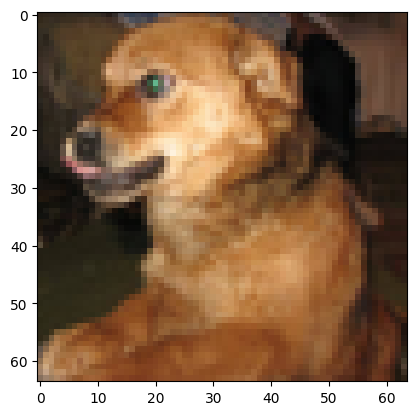

In [156]:
plt.imshow(train_x[60]) #Coincide con la predicción!